In [100]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Dense, Input, MaxPooling2D, Flatten, Dropout

In [2]:
sales_df = pd.read_csv('Dataset/Marketing_Dataset/sales_data_sample.csv', encoding = 'unicode_escape')

In [3]:
sales_df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped       1         2     2003  ...   
1       5/7/2003 0:00   Shipped       2         5     2003  ...   
2       7/1/2003 0:00   Shipped       3         7     2003  ...   
3      8/25/2003 0:00   Shipped       3         8     2003  ...   
4     10/10/2003 0:00   Shipped       4        10     2003  ...   
...               ...       ...     ...       ...      ...  ...   
2818   12/2/2004 0:00   Shipped       4        12     2004  ...   
2819   1/31/2005 0:00   Shipped       1         1     2005  ...   
2820    3/1/2005 0:00  Resolved       1         3     2005  ...   
2821   3/28/2005 0:00   Shipped       1         3     2005  ...   
2822    5/6/2005 0:00   On Hold       2         5     2005  ...   

                       ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0           897 Long Airport Avenue           NaN            NYC    NY   
1                59 rue de l'Abbaye           NaN          Reims   NaN   
2     27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3                78934 Hillside Dr.           NaN       Pasadena    CA   
4                   7734 Strong St.           NaN  San Francisco    CA   
...                             ...           ...            ...   ...   
2818             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2819                    Torikatu 38           NaN           Oulu   NaN   
2820             C/ Moralzarzal, 86           NaN         Madrid   NaN   
2821          1 rue Alsace-Lorraine           NaN       Toulouse   NaN   
2822             8616 Spinnaker Dr.           NaN         Boston    MA   

     POSTALCODE  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         10022      USA       NaN              Yu             Kwai    Small  
1         51100   France      EMEA         Henriot             Paul    Small  
2         75508   France      EMEA        Da Cunha           Daniel   Medium  
3         90003      USA       NaN           Young            Julie   Medium  
4           NaN      USA       NaN           Brown            Julie   Medium  
...         ...      ...       ...             ...              ...      ...  
2818      28034    Spain      EMEA          Freyre            Diego    Small  
2819      90110  Finland      EMEA       Koskitalo           Pirkko   Medium  
2820      28034    Spain      EMEA          Freyre            Diego   Medium  
2821      31000   France      EMEA          Roulet          Annette    Small  
2822      51003      USA       NaN         Yoshido             Juri   Medium  

[2823 rows x 25 columns]

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [7]:
sales_df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [8]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
sales_df = sales_df.drop(df_drop, axis = 1)
sales_df.head()

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE   STATUS  \
0               30      95.70                2  2871.00 2003-02-24  Shipped   
1               34      81.35                5  2765.90 2003-05-07  Shipped   
2               41      94.74                2  3884.34 2003-07-01  Shipped   
3               45      83.26                6  3746.70 2003-08-25  Shipped   
4               49     100.00               14  5205.27 2003-10-10  Shipped   

   QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE COUNTRY DEALSIZE  
0       1         2     2003  Motorcycles    95    S10_1678     USA    Small  
1       2         5     2003  Motorcycles    95    S10_1678  France    Small  
2       3         7     2003  Motorcycles    95    S10_1678  France   Medium  
3       3         8     2003  Motorcycles    95    S10_1678     USA   Medium  
4       4        10     2003  Motorcycles    95    S10_1678     USA   Medium

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   QTR_ID           2823 non-null   int64         
 7   MONTH_ID         2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  COUNTRY          2823 non-null   object        
 13  DEALSIZE         2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(

In [10]:
sales_df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

In [11]:
sales_df['COUNTRY'].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')

In [12]:
sales_df['COUNTRY'].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [13]:
def barplot_visualization(x):
    fig = plt.figure(figsize=(12,6))
    fig = px.bar(x = sales_df[x].value_counts().index, y= sales_df[x].value_counts(), height= 600, color = sales_df[x].value_counts().index)
    fig.show()

In [14]:
barplot_visualization('COUNTRY')

<Figure size 864x432 with 0 Axes>

In [15]:
sales_df['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [16]:
barplot_visualization('STATUS')

<Figure size 864x432 with 0 Axes>

In [17]:
sales_df.drop('STATUS', axis=1, inplace=True)

In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   QTR_ID           2823 non-null   int64         
 6   MONTH_ID         2823 non-null   int64         
 7   YEAR_ID          2823 non-null   int64         
 8   PRODUCTLINE      2823 non-null   object        
 9   MSRP             2823 non-null   int64         
 10  PRODUCTCODE      2823 non-null   object        
 11  COUNTRY          2823 non-null   object        
 12  DEALSIZE         2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 286.8+ KB


In [19]:
barplot_visualization('DEALSIZE')

<Figure size 864x432 with 0 Axes>

In [20]:
def dummies(x):
    dummy = pd.get_dummies(sales_df[x])
    sales_df.drop(columns = x, inplace=True)
    return pd.concat([sales_df,dummy],axis=1)

In [21]:
sales_df = dummies('COUNTRY')
sales_df = dummies('PRODUCTLINE')
sales_df = dummies('DEALSIZE')

In [22]:
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0                  30      95.70                2  2871.00 2003-02-24       1   
1                  34      81.35                5  2765.90 2003-05-07       2   
2                  41      94.74                2  3884.34 2003-07-01       3   
3                  45      83.26                6  3746.70 2003-08-25       3   
4                  49     100.00               14  5205.27 2003-10-10       4   
...               ...        ...              ...      ...        ...     ...   
2818               20     100.00               15  2244.40 2004-12-02       4   
2819               29     100.00                1  3978.51 2005-01-31       1   
2820               43     100.00                4  5417.57 2005-03-01       1   
2821               34      62.24                1  2116.16 2005-03-28       1   
2822               47      65.52                9  3079.44 2005-05-06       2   

      MONTH_ID  YEAR_ID  MSRP PRODUCTCODE  ...  Classic Cars  Motorcycles  \
0            2     2003    95    S10_1678  ...             0            1   
1            5     2003    95    S10_1678  ...             0            1   
2            7     2003    95    S10_1678  ...             0            1   
3            8     2003    95    S10_1678  ...             0            1   
4           10     2003    95    S10_1678  ...             0            1   
...        ...      ...   ...         ...  ...           ...          ...   
2818        12     2004    54    S72_3212  ...             0            0   
2819         1     2005    54    S72_3212  ...             0            0   
2820         3     2005    54    S72_3212  ...             0            0   
2821         3     2005    54    S72_3212  ...             0            0   
2822         5     2005    54    S72_3212  ...             0            0   

      Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  Medium  \
0          0      0       0                 0             0      0       0   
1          0      0       0                 0             0      0       0   
2          0      0       0                 0             0      0       1   
3          0      0       0                 0             0      0       1   
4          0      0       0                 0             0      0       1   
...      ...    ...     ...               ...           ...    ...     ...   
2818       0      1       0                 0             0      0       0   
2819       0      1       0                 0             0      0       1   
2820       0      1       0                 0             0      0       1   
2821       0      1       0                 0             0      0       0   
2822       0      1       0                 0             0      0       1   

      Small  
0         1  
1         1  
2         0  
3         0  
4         0  
...     ...  
2818      1  
2819      0  
2820      0  
2821      1  
2822      0  

[2823 rows x 39 columns]

In [23]:
sales_df['PRODUCTCODE'].unique()

array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

In [24]:
def encode_code(x):
    le = LabelEncoder()
    le.fit(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_3432',
       'S24_3816', 'S24_3856', 'S24_3949', 'S24_3969', 'S24_4048',
       'S24_4258', 'S24_4278', 'S24_4620', 'S32_1268', 'S32_1374',
       'S32_2206', 'S32_2509', 'S32_3207', 'S32_3522', 'S32_4289',
       'S32_4485', 'S50_1341', 'S50_1392', 'S50_1514', 'S50_4713',
       'S700_1138', 'S700_1691', 'S700_1938', 'S700_2047', 'S700_2466',
       'S700_2610', 'S700_2824', 'S700_2834', 'S700_3167', 'S700_3505',
       'S700_3962', 'S700_4002', 'S72_1253', 'S72_3212'])
    sales_df[x] = le.transform(sales_df[x])
    return sales_df

In [25]:
sales_df = encode_code('PRODUCTCODE')

In [26]:
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0                  30      95.70                2  2871.00 2003-02-24       1   
1                  34      81.35                5  2765.90 2003-05-07       2   
2                  41      94.74                2  3884.34 2003-07-01       3   
3                  45      83.26                6  3746.70 2003-08-25       3   
4                  49     100.00               14  5205.27 2003-10-10       4   
...               ...        ...              ...      ...        ...     ...   
2818               20     100.00               15  2244.40 2004-12-02       4   
2819               29     100.00                1  3978.51 2005-01-31       1   
2820               43     100.00                4  5417.57 2005-03-01       1   
2821               34      62.24                1  2116.16 2005-03-28       1   
2822               47      65.52                9  3079.44 2005-05-06       2   

      MONTH_ID  YEAR_ID  MSRP  PRODUCTCODE  ...  Classic Cars  Motorcycles  \
0            2     2003    95            0  ...             0            1   
1            5     2003    95            0  ...             0            1   
2            7     2003    95            0  ...             0            1   
3            8     2003    95            0  ...             0            1   
4           10     2003    95            0  ...             0            1   
...        ...      ...   ...          ...  ...           ...          ...   
2818        12     2004    54          108  ...             0            0   
2819         1     2005    54          108  ...             0            0   
2820         3     2005    54          108  ...             0            0   
2821         3     2005    54          108  ...             0            0   
2822         5     2005    54          108  ...             0            0   

      Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  Medium  \
0          0      0       0                 0             0      0       0   
1          0      0       0                 0             0      0       0   
2          0      0       0                 0             0      0       1   
3          0      0       0                 0             0      0       1   
4          0      0       0                 0             0      0       1   
...      ...    ...     ...               ...           ...    ...     ...   
2818       0      1       0                 0             0      0       0   
2819       0      1       0                 0             0      0       1   
2820       0      1       0                 0             0      0       1   
2821       0      1       0                 0             0      0       0   
2822       0      1       0                 0             0      0       1   

      Small  
0         1  
1         1  
2         0  
3         0  
4         0  
...     ...  
2818      1  
2819      0  
2820      0  
2821      1  
2822      0  

[2823 rows x 39 columns]

In [27]:
sales_df_group = sales_df.groupby(by='ORDERDATE').sum()
sales_df_group

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  QTR_ID  \
ORDERDATE                                                                   
2003-01-06              151     288.78               10  12133.25       4   
2003-01-09              142     284.96               10  11432.34       4   
2003-01-10               80     150.14                3   6864.05       2   
2003-01-29              541    1417.54              136  54702.00      16   
2003-01-31              443    1061.89               91  44621.96      13   
...                     ...        ...              ...       ...     ...   
2005-05-13              259     561.18               21  31821.90      12   
2005-05-17              509    1269.43              105  59475.10      28   
2005-05-29              607    1148.40               94  51233.18      30   
2005-05-30              187     542.16               18  14578.75      14   
2005-05-31              696    1561.40              112  78918.03      38   

            MONTH_ID  YEAR_ID  MSRP  PRODUCTCODE  Australia  ...  \
ORDERDATE                                                    ...   
2003-01-06         4     8012   363          174          0  ...   
2003-01-09         4     8012   372          181          0  ...   
2003-01-10         2     4006   155           37          0  ...   
2003-01-29        16    32048  1695          723          0  ...   
2003-01-31        13    26039  1365          720          0  ...   
...              ...      ...   ...          ...        ...  ...   
2005-05-13        30    12030   728          101          0  ...   
2005-05-17        70    28070  1669          462          0  ...   
2005-05-29        75    30075  1328          797         13  ...   
2005-05-30        35    14035   618          265          0  ...   
2005-05-31        95    38095  2065          899          0  ...   

            Classic Cars  Motorcycles  Planes  Ships  Trains  \
ORDERDATE                                                      
2003-01-06             0            0       0      0       0   
2003-01-09             0            0       0      0       0   
2003-01-10             0            0       0      0       0   
2003-01-29             3            0       0      0       0   
2003-01-31             7            0       0      0       2   
...                  ...          ...     ...    ...     ...   
2005-05-13             0            6       0      0       0   
2005-05-17            14            0       0      0       0   
2005-05-29             7            0       0      0       0   
2005-05-30             0            0       0      0       0   
2005-05-31             7            0       0      0       0   

            Trucks and Buses  Vintage Cars  Large  Medium  Small  
ORDERDATE                                                         
2003-01-06                 0             4      0       2      2  
2003-01-09                 0             4      0       2      2  
2003-01-10                 0             2      0       1      1  
2003-01-29                 7             6      0      10      6  
2003-01-31                 4             0      0       8      5  
...                      ...           ...    ...     ...    ...  
2005-05-13                 0             0      2       3      1  
2005-05-17                 0             0      2       8      4  
2005-05-29                 0             8      0       8      7  
2005-05-30                 0             7      0       1      6  
2005-05-31                11             1      3       9      7  

[252 rows x 38 columns]

In [28]:
fig = plt.figure(figsize=(15,5))
fig = px.line(x= sales_df_group.index, y=sales_df_group['SALES'], title='SALES')
fig.show()

<Figure size 1080x360 with 0 Axes>

In [29]:
sales_df.drop('ORDERDATE',inplace=True, axis=1)
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  MONTH_ID  \
0                  30      95.70                2  2871.00       1         2   
1                  34      81.35                5  2765.90       2         5   
2                  41      94.74                2  3884.34       3         7   
3                  45      83.26                6  3746.70       3         8   
4                  49     100.00               14  5205.27       4        10   
...               ...        ...              ...      ...     ...       ...   
2818               20     100.00               15  2244.40       4        12   
2819               29     100.00                1  3978.51       1         1   
2820               43     100.00                4  5417.57       1         3   
2821               34      62.24                1  2116.16       1         3   
2822               47      65.52                9  3079.44       2         5   

      YEAR_ID  MSRP  PRODUCTCODE  Australia  ...  Classic Cars  Motorcycles  \
0        2003    95            0          0  ...             0            1   
1        2003    95            0          0  ...             0            1   
2        2003    95            0          0  ...             0            1   
3        2003    95            0          0  ...             0            1   
4        2003    95            0          0  ...             0            1   
...       ...   ...          ...        ...  ...           ...          ...   
2818     2004    54          108          0  ...             0            0   
2819     2005    54          108          0  ...             0            0   
2820     2005    54          108          0  ...             0            0   
2821     2005    54          108          0  ...             0            0   
2822     2005    54          108          0  ...             0            0   

      Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  Medium  \
0          0      0       0                 0             0      0       0   
1          0      0       0                 0             0      0       0   
2          0      0       0                 0             0      0       1   
3          0      0       0                 0             0      0       1   
4          0      0       0                 0             0      0       1   
...      ...    ...     ...               ...           ...    ...     ...   
2818       0      1       0                 0             0      0       0   
2819       0      1       0                 0             0      0       1   
2820       0      1       0                 0             0      0       1   
2821       0      1       0                 0             0      0       0   
2822       0      1       0                 0             0      0       1   

      Small  
0         1  
1         1  
2         0  
3         0  
4         0  
...     ...  
2818      1  
2819      0  
2820      0  
2821      1  
2822      0  

[2823 rows x 38 columns]

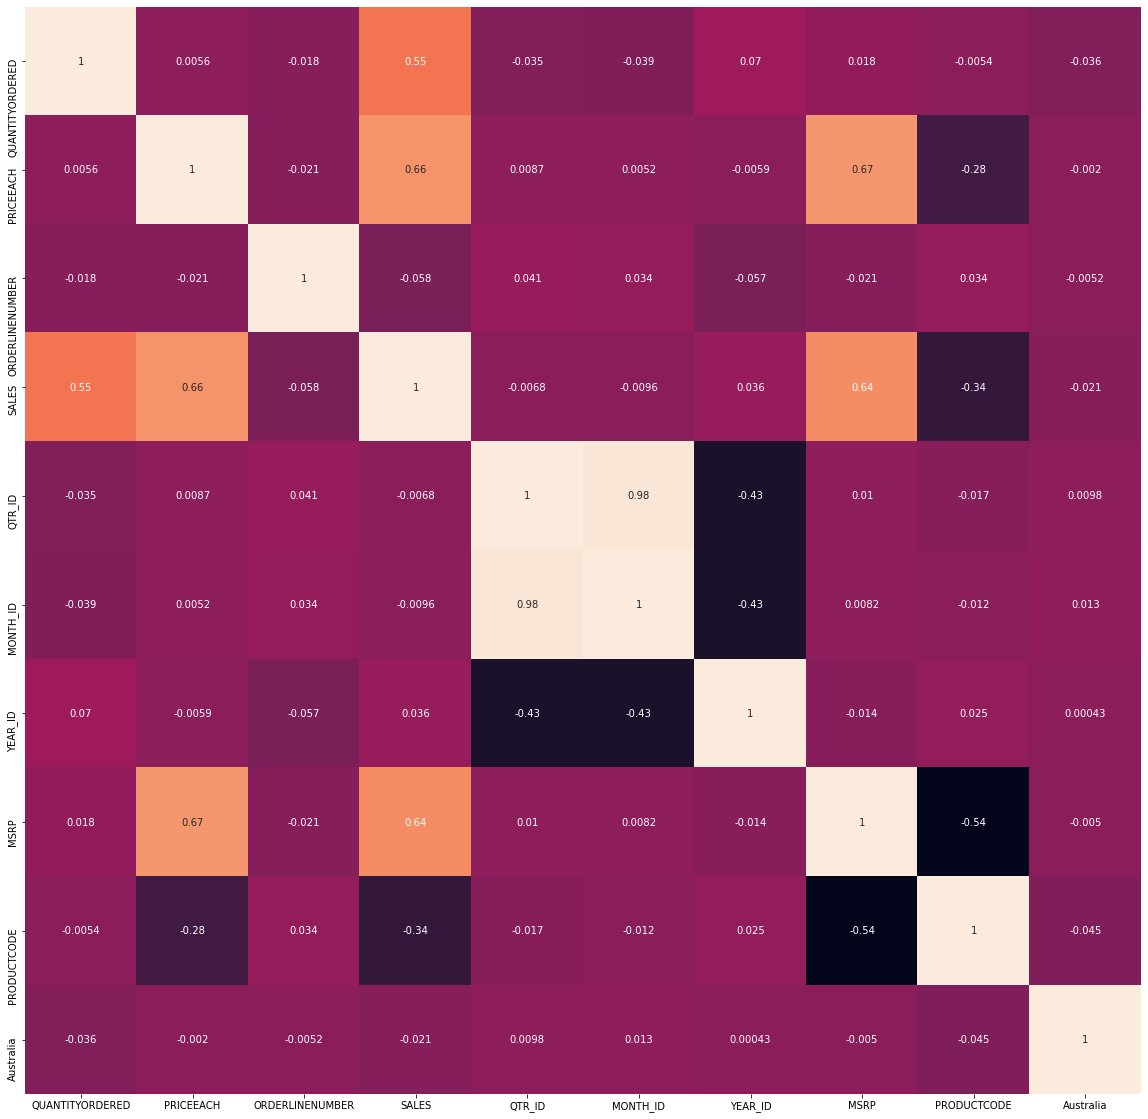

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(sales_df.iloc[:,:10].corr(), annot=True, cbar=False)
plt.show()

In [31]:
sales_df.drop('QTR_ID', axis=1, inplace=True)
sales_df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  MONTH_ID  YEAR_ID  \
0                  30      95.70                2  2871.00         2     2003   
1                  34      81.35                5  2765.90         5     2003   
2                  41      94.74                2  3884.34         7     2003   
3                  45      83.26                6  3746.70         8     2003   
4                  49     100.00               14  5205.27        10     2003   
...               ...        ...              ...      ...       ...      ...   
2818               20     100.00               15  2244.40        12     2004   
2819               29     100.00                1  3978.51         1     2005   
2820               43     100.00                4  5417.57         3     2005   
2821               34      62.24                1  2116.16         3     2005   
2822               47      65.52                9  3079.44         5     2005   

      MSRP  PRODUCTCODE  Australia  Austria  ...  Classic Cars  Motorcycles  \
0       95            0          0        0  ...             0            1   
1       95            0          0        0  ...             0            1   
2       95            0          0        0  ...             0            1   
3       95            0          0        0  ...             0            1   
4       95            0          0        0  ...             0            1   
...    ...          ...        ...      ...  ...           ...          ...   
2818    54          108          0        0  ...             0            0   
2819    54          108          0        0  ...             0            0   
2820    54          108          0        0  ...             0            0   
2821    54          108          0        0  ...             0            0   
2822    54          108          0        0  ...             0            0   

      Planes  Ships  Trains  Trucks and Buses  Vintage Cars  Large  Medium  \
0          0      0       0                 0             0      0       0   
1          0      0       0                 0             0      0       0   
2          0      0       0                 0             0      0       1   
3          0      0       0                 0             0      0       1   
4          0      0       0                 0             0      0       1   
...      ...    ...     ...               ...           ...    ...     ...   
2818       0      1       0                 0             0      0       0   
2819       0      1       0                 0             0      0       1   
2820       0      1       0                 0             0      0       1   
2821       0      1       0                 0             0      0       0   
2822       0      1       0                 0             0      0       1   

      Small  
0         1  
1         1  
2         0  
3         0  
4         0  
...     ...  
2818      1  
2819      0  
2820      0  
2821      1  
2822      0  

[2823 rows x 37 columns]

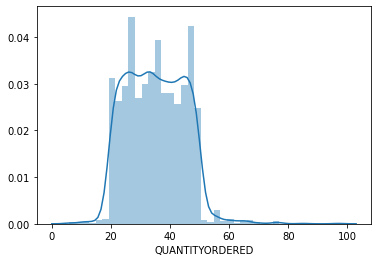

In [42]:
sns.distplot(sales_df['QUANTITYORDERED'])

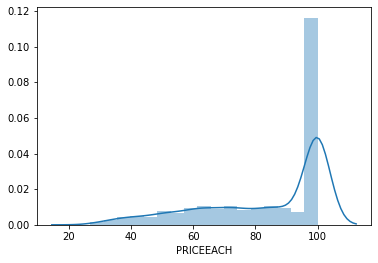

In [36]:
sns.distplot(sales_df['PRICEEACH'])

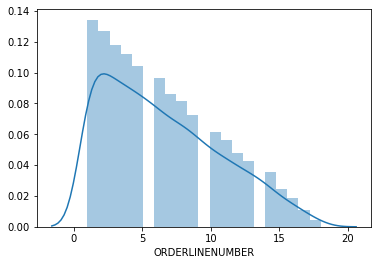

In [37]:
sns.distplot(sales_df['ORDERLINENUMBER'])

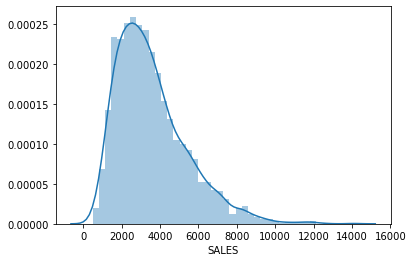

In [38]:
sns.distplot(sales_df['SALES'])

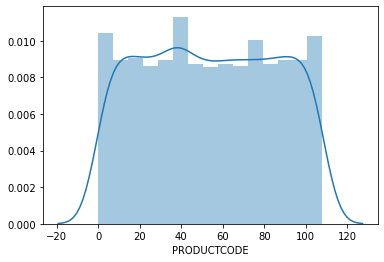

In [39]:
sns.distplot(sales_df['PRODUCTCODE'])

In [45]:
fig = plt.figure(figsize=(15,15))
fig = px.scatter_matrix(sales_df, dimensions = sales_df.columns[:8], color='MONTH_ID')

fig.update_layout(
                title = 'Sales Data',
                width = 1000,
                height= 1000)
fig.show()

<Figure size 1080x1080 with 0 Axes>

In [47]:
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [49]:
sales_df_scaled

array([[-0.52289086,  0.5969775 , -1.05705871, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [-0.11220131, -0.11445035, -0.34701507, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 0.60650538,  0.54938372, -1.05705871, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       ...,
       [ 0.81185016,  0.81015797, -0.58369628, ..., -0.24267205,
         1.01967636, -0.9121005 ],
       [-0.11220131, -1.06186404, -1.29373992, ..., -0.24267205,
        -0.98070333,  1.09637041],
       [ 1.2225397 , -0.89925195,  0.59970978, ..., -0.24267205,
         1.01967636, -0.9121005 ]])

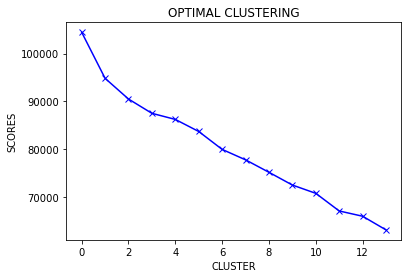

In [53]:
scores = []

range_values = range(1,15)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(sales_df_scaled)
    scores.append(kmeans.inertia_)
    
plt.plot(scores,'bx-')
plt.title('OPTIMAL CLUSTERING')
plt.xlabel('CLUSTER')
plt.ylabel('SCORES')
plt.show()

In [55]:
kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_

In [56]:
labels

array([2, 2, 3, ..., 4, 4, 4])

In [57]:
kmeans.cluster_centers_.shape

(5, 37)

In [58]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

QUANTITYORDERED PRICEEACH ORDERLINENUMBER     SALES  MONTH_ID   YEAR_ID  \
0       -0.029274 -0.027627        0.096004  0.002030  0.006272 -0.413767   
1        1.247208  0.800027       -0.270171  2.575664 -0.091005  0.152939   
2       -0.465637 -0.767813        0.035397 -0.823904  0.006244  0.010110   
3        0.276499  0.591360       -0.021912  0.474020  0.010829 -0.006149   
4       -0.052830  0.015937        0.094447 -0.276501 -0.030046  0.021935   

       MSRP PRODUCTCODE Australia   Austria  ... Classic Cars Motorcycles  \
0  0.098333   -0.109335 -0.264819 -0.140961  ...     0.115670   -0.324602   
1  1.422435   -0.866101 -0.081137  0.046965  ...     0.564409    0.019040   
2 -0.585439    0.183987  0.063805 -0.024578  ...    -0.107914    0.068877   
3  0.412473   -0.259712  0.011739  0.027975  ...     0.153649    0.023460   
4 -0.364827    1.124297 -0.229680 -0.015132  ...    -0.721812   -0.364452   

     Planes     Ships    Trains Trucks and Buses Vintage Cars     Large  \
0 -0.348674 -0.114641  0.226088         0.609936    -0.086488 -0.074847   
1 -0.160686 -0.300637 -0.127589        -0.198194    -0.144036  4.120788   
2  0.134260 -0.300637  0.084919        -0.024069     0.155295 -0.242672   
3 -0.014573 -0.300637 -0.043878         0.071931    -0.019704 -0.242672   
4 -0.348674  3.326275 -0.167454        -0.345470    -0.523371 -0.242672   

     Medium     Small  
0 -0.006159  0.040636  
1 -0.980703 -0.912100  
2 -0.980703  1.096370  
3  1.019676 -0.912100  
4 -0.076184  0.188192  

[5 rows x 37 columns]

In [61]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns = [sales_df.columns])
cluster_centers

# Cluster 0 (Highest) - This group represents customers who buy items in high quantity centered around ~47, they buy items in all price range leaning towards high price items of ~99. They also correspond to the highest total sales around ~8296 and they are active throughout the year. They are the highest buyers of products with high MSRP ~158.
# Cluster 1 - This group represents customers who buy items in varying quantity ~35, they tend to buy high price items ~96. Their sales is bit better average ~4435, they buy products with second highest MSRP of ~133.
# Cluster 2 (lowest) - This group represents customers who buy items in low quantity ~30. They tend to buy low price items ~68. Their sales ~2044 is lower than other clusters and they are extremely active around holiday season. They buy products with low MSRP ~75.
# Cluster 3 - This group represents customers who are only active during the holidays. they buy in lower quantity ~35, but they tend to buy average price items around ~86. They also correspond to lower total sales around ~3673, they tend to buy items with MSRP around 102.
# Cluster 4 - This group represents customers who buy items in varying quantity ~39, they tend to buy average price items ~94. Their sales ~4280.

QUANTITYORDERED  PRICEEACH ORDERLINENUMBER        SALES  MONTH_ID  \
0       34.807692  83.101282        6.871795  3557.627051  7.115385   
1       47.240260  99.795649        5.324675  8297.075130  6.759740   
2       30.557641  68.171206        6.615728  2036.637185  7.115282   
3       37.785829  95.586683        6.373591  4426.816224  7.132045   
4       34.578261  83.980000        6.865217  3044.702652  6.982609   

       YEAR_ID        MSRP PRODUCTCODE     Australia   Austria  ...  \
0  2003.525641  104.666667   50.320513  1.387779e-17  0.000000  ...   
1  2003.922078  157.870130   26.422078  4.545455e-02  0.025974  ...   
2  2003.822163   77.192136   59.583557  8.132261e-02  0.016086  ...   
3  2003.810789  117.289050   45.571659  6.843800e-02  0.023349  ...   
4  2003.830435   86.056522   89.278261  8.695652e-03  0.017391  ...   

   Classic Cars   Motorcycles        Planes         Ships        Trains  \
0  3.974359e-01  1.282051e-02  2.775558e-17  5.128205e-02  6.410256e-02   
1  6.103896e-01  1.233766e-01  5.844156e-02 -2.775558e-17  6.493506e-03   
2  2.913315e-01  1.394102e-01  1.501340e-01  4.163336e-17  4.110813e-02   
3  4.154589e-01  1.247987e-01  1.038647e-01  1.804112e-16  2.012882e-02   
4 -1.110223e-16  8.326673e-17 -9.714451e-17  1.000000e+00  1.734723e-17   

  Trucks and Buses  Vintage Cars         Large        Medium         Small  
0     2.948718e-01  1.794872e-01  3.846154e-02  4.871795e-01  4.743590e-01  
1     4.545455e-02  1.558442e-01  1.000000e+00 -2.775558e-16  0.000000e+00  
2     9.919571e-02  2.788204e-01 -9.020562e-17 -7.216450e-16  1.000000e+00  
3     1.288245e-01  2.069243e-01 -1.040834e-16  1.000000e+00 -5.551115e-17  
4    -2.775558e-17  2.775558e-16 -6.938894e-18  4.521739e-01  5.478261e-01  

[5 rows x 37 columns]

In [62]:
labels.shape

(2823,)

In [67]:
print(labels.max())
print(labels.min())

4
0


In [68]:
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans


array([2, 2, 1, ..., 1, 2, 1])

In [69]:
y_kmeans.shape

(2823,)

In [70]:
sales_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})],axis=1)
sales_df_cluster

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  MONTH_ID  YEAR_ID  \
0                  30      95.70                2  2871.00         2     2003   
1                  34      81.35                5  2765.90         5     2003   
2                  41      94.74                2  3884.34         7     2003   
3                  45      83.26                6  3746.70         8     2003   
4                  49     100.00               14  5205.27        10     2003   
...               ...        ...              ...      ...       ...      ...   
2818               20     100.00               15  2244.40        12     2004   
2819               29     100.00                1  3978.51         1     2005   
2820               43     100.00                4  5417.57         3     2005   
2821               34      62.24                1  2116.16         3     2005   
2822               47      65.52                9  3079.44         5     2005   

      MSRP  PRODUCTCODE  Australia  Austria  ...  Motorcycles  Planes  Ships  \
0       95            0          0        0  ...            1       0      0   
1       95            0          0        0  ...            1       0      0   
2       95            0          0        0  ...            1       0      0   
3       95            0          0        0  ...            1       0      0   
4       95            0          0        0  ...            1       0      0   
...    ...          ...        ...      ...  ...          ...     ...    ...   
2818    54          108          0        0  ...            0       0      1   
2819    54          108          0        0  ...            0       0      1   
2820    54          108          0        0  ...            0       0      1   
2821    54          108          0        0  ...            0       0      1   
2822    54          108          0        0  ...            0       0      1   

      Trains  Trucks and Buses  Vintage Cars  Large  Medium  Small  cluster  
0          0                 0             0      0       0      1        2  
1          0                 0             0      0       0      1        2  
2          0                 0             0      0       1      0        3  
3          0                 0             0      0       1      0        3  
4          0                 0             0      0       1      0        3  
...      ...               ...           ...    ...     ...    ...      ...  
2818       0                 0             0      0       0      1        4  
2819       0                 0             0      0       1      0        4  
2820       0                 0             0      0       1      0        4  
2821       0                 0             0      0       0      1        4  
2822       0                 0             0      0       1      0        4  

[2823 rows x 38 columns]

In [71]:
sales_df['ORDERLINENUMBER'] = sales_df['ORDERLINENUMBER'].apply(lambda x : float(x))

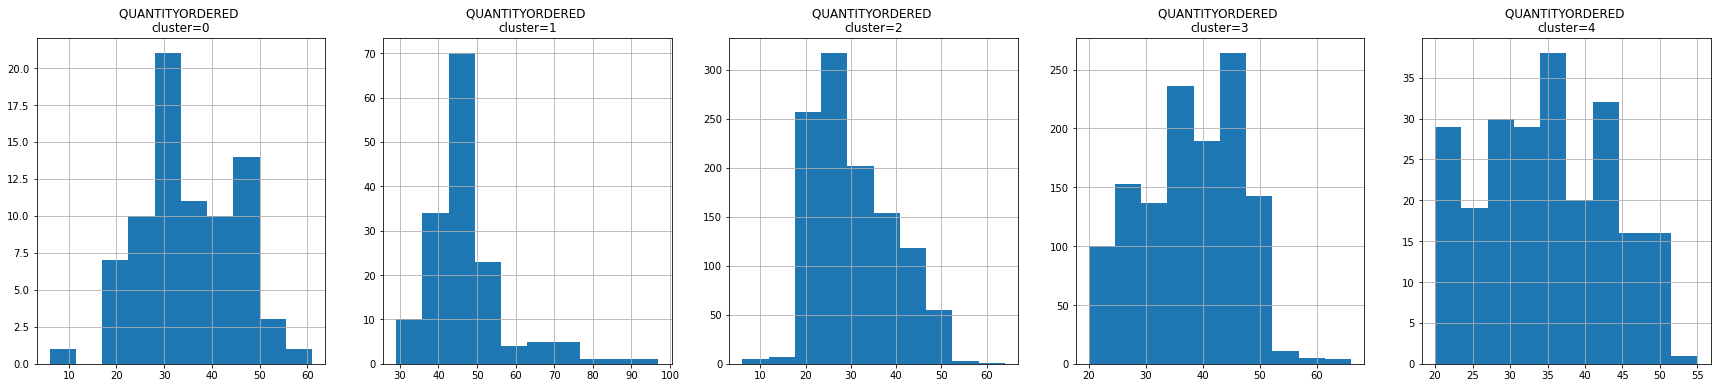

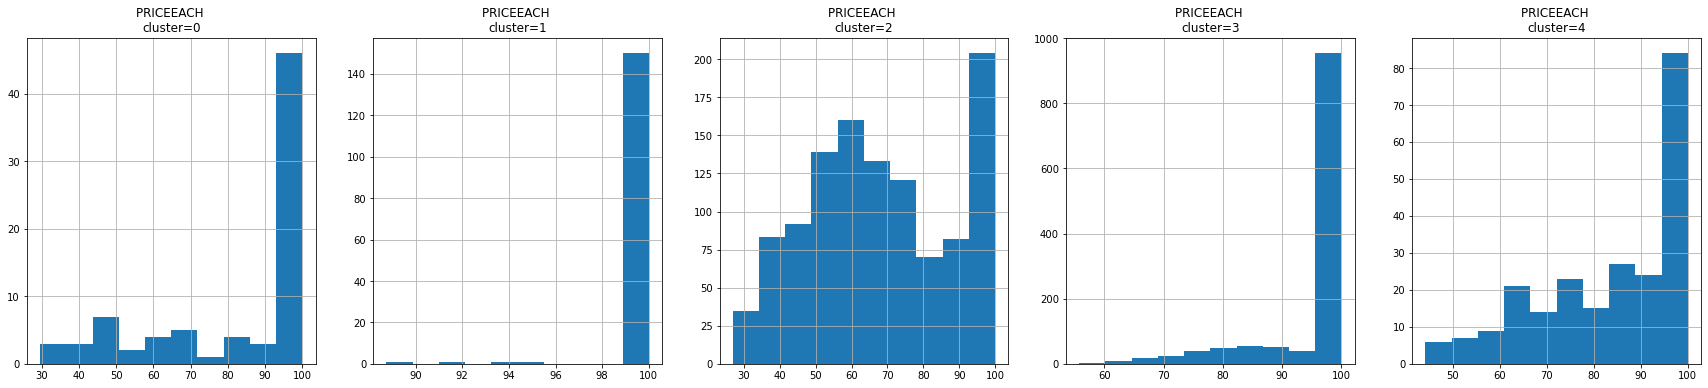

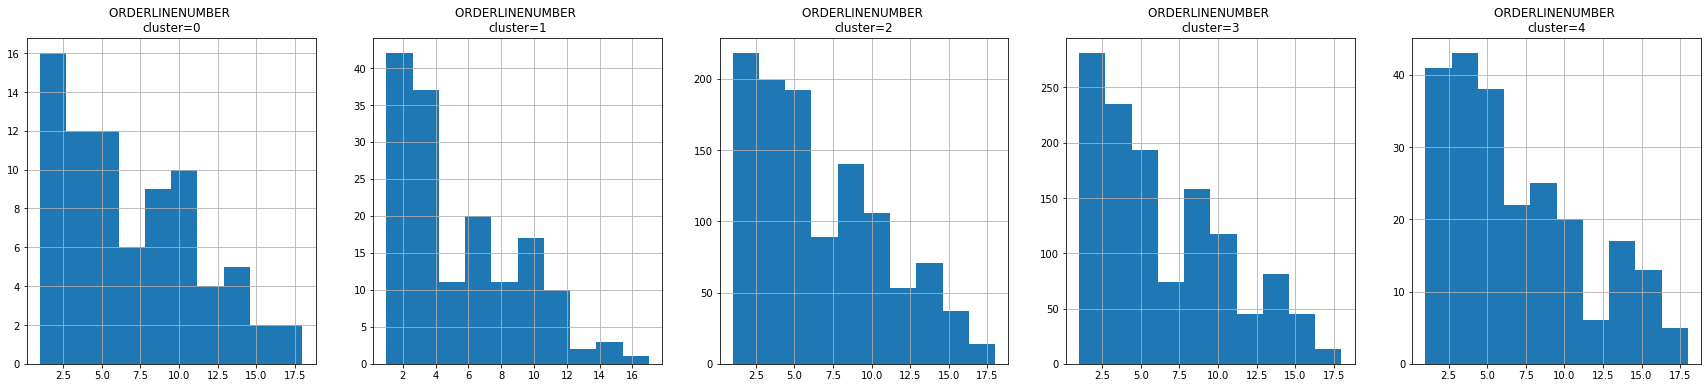

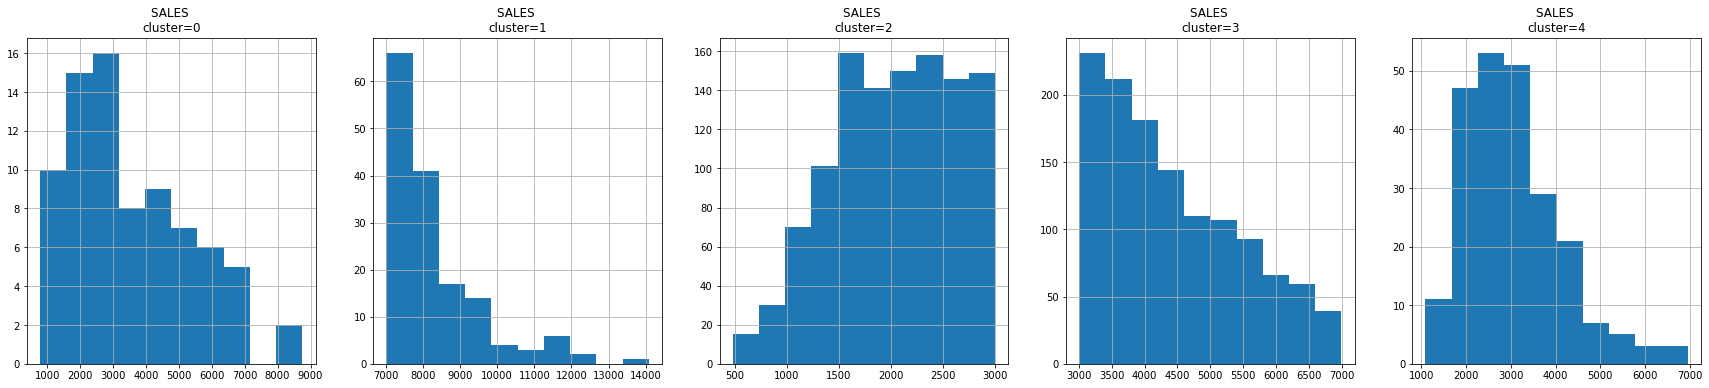

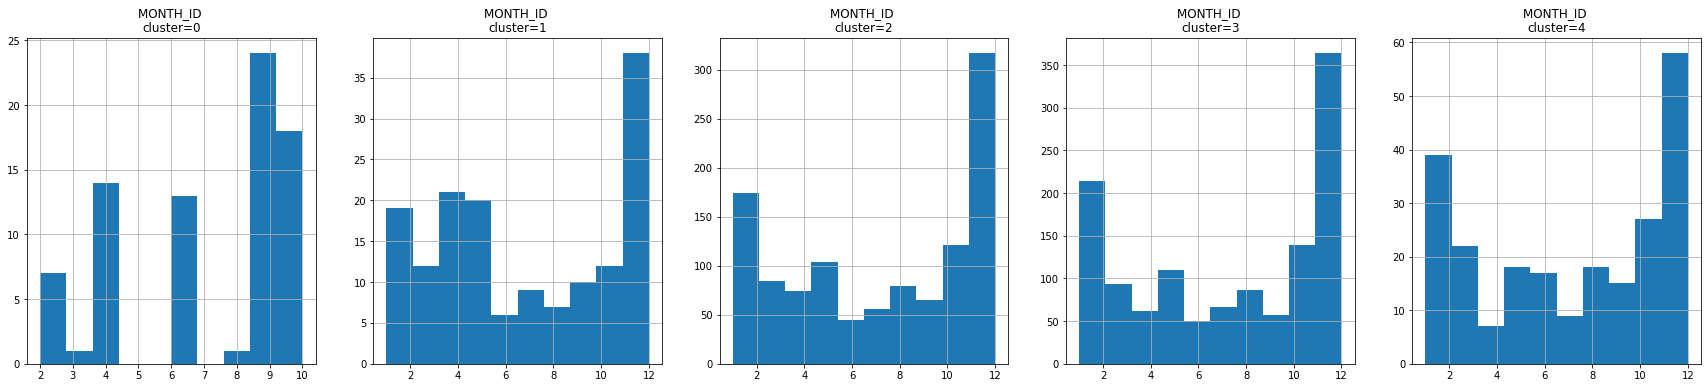

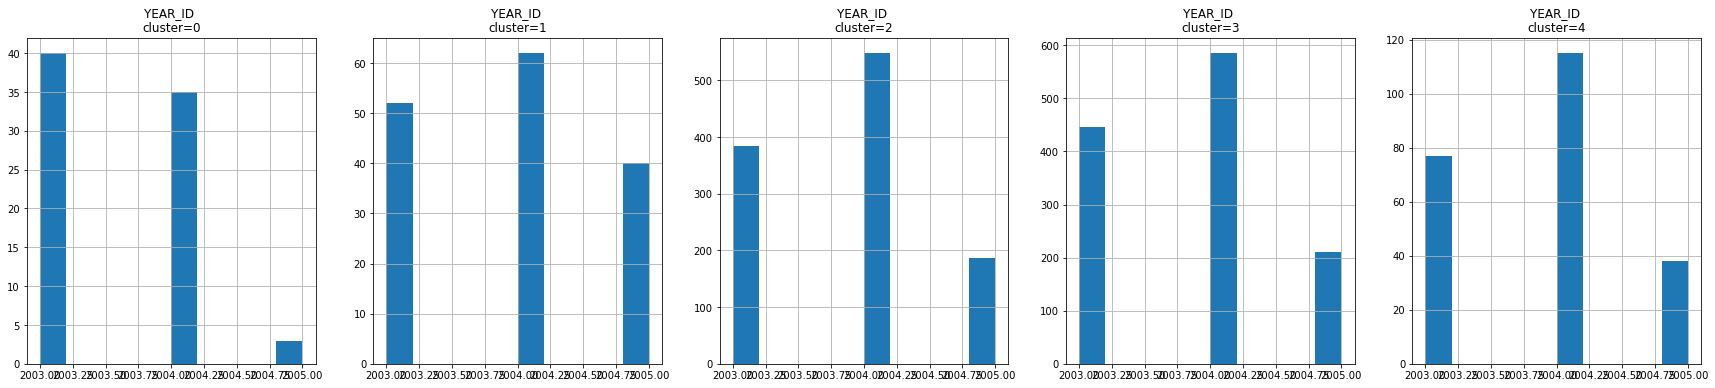

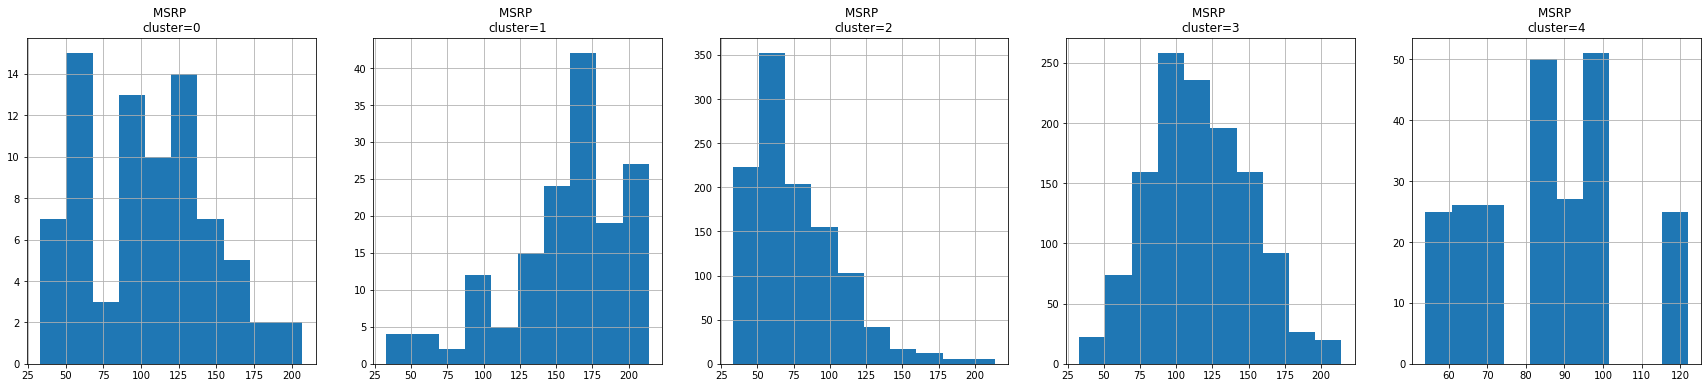

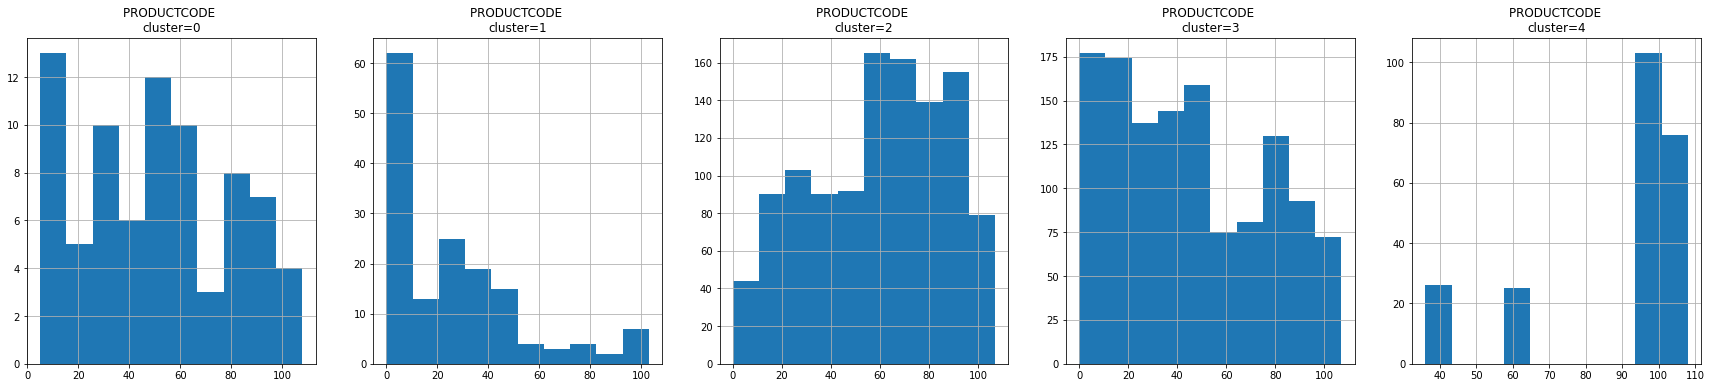

In [75]:
for i in sales_df.columns[:8]:
    plt.figure(figsize=(30,6))
    for j in range(5):
        plt.subplot(1,5, j+1)
        cluster = sales_df_cluster[sales_df_cluster['cluster'] == j]
        cluster[i].hist()
        plt.title('{} \ncluster={}'.format(i,j))
        
    plt.show()

In [76]:
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48632661, -1.20082375,  0.99289594],
       [-0.78466073, -1.04102728,  1.46238117],
       [ 1.43145461,  0.11427258,  0.33100458],
       ...,
       [ 0.38992785,  4.12623811, -0.0830022 ],
       [-2.78883921,  2.38349673,  1.56367608],
       [-0.70548261,  3.31042239, -0.56527578]])

In [77]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca_1','pca_2','pca_3'])
pca_df

pca_1     pca_2     pca_3
0    -0.486327 -1.200824  0.992896
1    -0.784661 -1.041027  1.462381
2     1.431455  0.114273  0.331005
3     1.288400 -0.225235 -0.590734
4     1.975986 -0.150828 -1.069984
...        ...       ...       ...
2818 -2.450254  1.107210 -1.520408
2819 -0.158275  3.705225  0.558831
2820  0.389928  4.126238 -0.083002
2821 -2.788839  2.383497  1.563676
2822 -0.705483  3.310422 -0.565276

[2823 rows x 3 columns]

In [78]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df

pca_1     pca_2     pca_3  cluster
0    -0.486327 -1.200824  0.992896        2
1    -0.784661 -1.041027  1.462381        2
2     1.431455  0.114273  0.331005        3
3     1.288400 -0.225235 -0.590734        3
4     1.975986 -0.150828 -1.069984        3
...        ...       ...       ...      ...
2818 -2.450254  1.107210 -1.520408        4
2819 -0.158275  3.705225  0.558831        4
2820  0.389928  4.126238 -0.083002        4
2821 -2.788839  2.383497  1.563676        4
2822 -0.705483  3.310422 -0.565276        4

[2823 rows x 4 columns]

In [82]:
fig = px.scatter_3d(pca_df, x='pca_1', y='pca_2', z='pca_3',
                    color = 'cluster', symbol = 'cluster', size_max=25, opacity=0.7)
fig.update_layout(margin = dict(l=0, r=0, b=0, t=0))

In [83]:
pca_2d = PCA(n_components = 2)
principal_comp_2d = pca_2d.fit_transform(sales_df_scaled)
principal_comp_2d

array([[-0.48623446, -1.17617895],
       [-0.78473102, -1.02705063],
       [ 1.43142876,  0.13830874],
       ...,
       [ 0.38990571,  4.11645646],
       [-2.78910645,  2.35570739],
       [-0.70550858,  3.30555259]])

In [85]:
pca_df_2d = pd.DataFrame(data = principal_comp_2d, columns=['pca_1','pca_2'])
pca_df_2d

pca_1     pca_2
0    -0.486234 -1.176179
1    -0.784731 -1.027051
2     1.431429  0.138309
3     1.288559 -0.190125
4     1.976168 -0.113634
...        ...       ...
2818 -2.450260  1.090890
2819 -0.158356  3.702193
2820  0.389906  4.116456
2821 -2.789106  2.355707
2822 -0.705509  3.305553

[2823 rows x 2 columns]

In [86]:
pca_df_2d = pd.concat([pca_df_2d, pd.DataFrame({'cluster': labels})], axis=1)
pca_df_2d

pca_1     pca_2  cluster
0    -0.486234 -1.176179        2
1    -0.784731 -1.027051        2
2     1.431429  0.138309        3
3     1.288559 -0.190125        3
4     1.976168 -0.113634        3
...        ...       ...      ...
2818 -2.450260  1.090890        4
2819 -0.158356  3.702193        4
2820  0.389906  4.116456        4
2821 -2.789106  2.355707        4
2822 -0.705509  3.305553        4

[2823 rows x 3 columns]

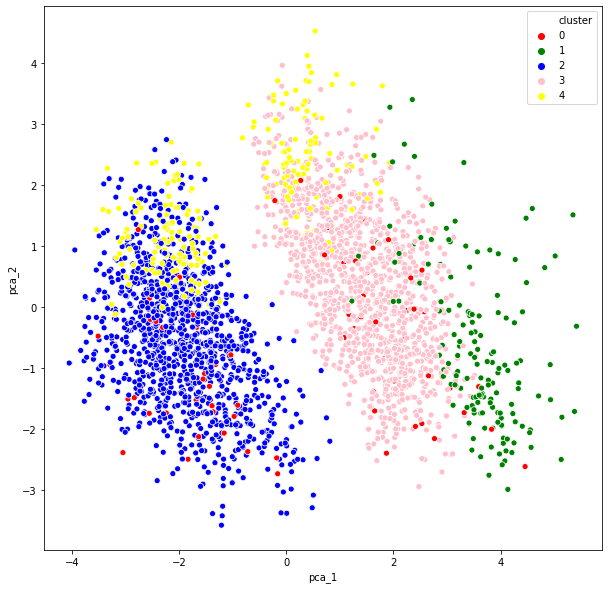

In [94]:
plt.figure(figsize=(10,10))
fig = sns.scatterplot(data = pca_df_2d, x = 'pca_1', y='pca_2',
                 hue = 'cluster', palette = ['red','green', 'blue', 'pink', 'yellow'] )
plt.show()

In [95]:
sales_df.shape

(2823, 37)

In [101]:
input_df = Input(shape=(37,))
x = Dense(50, activation='relu', kernel_initializer = 'glorot_uniform')(input_df)
x = Dense(100, activation ='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(8, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(37, kernel_initializer = 'glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(loss='mean_squared_error', optimizer = 'adam')

In [103]:
autoencoder.fit(sales_df, sales_df, batch_size =128, epochs = 500, verbose=3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [104]:
autoencoder.save_weights('autoencoder_1.h5')

In [105]:
pred = autoencoder.predict(sales_df_scaled)

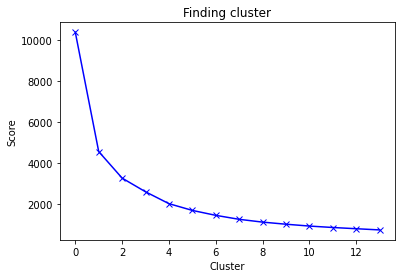

In [108]:
scores = []

range_values = range(1,15)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores.append(kmeans.inertia_)
    
plt.plot(scores,'bx-')
plt.title('Finding cluster')
plt.xlabel('Cluster')
plt.ylabel('Score')
plt.show()

In [110]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_predict = kmeans.fit_predict(sales_df_scaled)
y_predict

array([0, 0, 1, ..., 1, 0, 1])

In [114]:
df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster':labels})],axis=1)
df_cluster

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  MONTH_ID  YEAR_ID  \
0                  30      95.70              2.0  2871.00         2     2003   
1                  34      81.35              5.0  2765.90         5     2003   
2                  41      94.74              2.0  3884.34         7     2003   
3                  45      83.26              6.0  3746.70         8     2003   
4                  49     100.00             14.0  5205.27        10     2003   
...               ...        ...              ...      ...       ...      ...   
2818               20     100.00             15.0  2244.40        12     2004   
2819               29     100.00              1.0  3978.51         1     2005   
2820               43     100.00              4.0  5417.57         3     2005   
2821               34      62.24              1.0  2116.16         3     2005   
2822               47      65.52              9.0  3079.44         5     2005   

      MSRP  PRODUCTCODE  Australia  Austria  ...  Motorcycles  Planes  Ships  \
0       95            0          0        0  ...            1       0      0   
1       95            0          0        0  ...            1       0      0   
2       95            0          0        0  ...            1       0      0   
3       95            0          0        0  ...            1       0      0   
4       95            0          0        0  ...            1       0      0   
...    ...          ...        ...      ...  ...          ...     ...    ...   
2818    54          108          0        0  ...            0       0      1   
2819    54          108          0        0  ...            0       0      1   
2820    54          108          0        0  ...            0       0      1   
2821    54          108          0        0  ...            0       0      1   
2822    54          108          0        0  ...            0       0      1   

      Trains  Trucks and Buses  Vintage Cars  Large  Medium  Small  cluster  
0          0                 0             0      0       0      1        2  
1          0                 0             0      0       0      1        1  
2          0                 0             0      0       1      0        2  
3          0                 0             0      0       1      0        2  
4          0                 0             0      0       1      0        2  
...      ...               ...           ...    ...     ...    ...      ...  
2818       0                 0             0      0       0      1        2  
2819       0                 0             0      0       1      0        1  
2820       0                 0             0      0       1      0        0  
2821       0                 0             0      0       0      1        1  
2822       0                 0             0      0       1      0        1  

[2823 rows x 38 columns]

In [115]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [sales_df.columns])
cluster_centers

QUANTITYORDERED PRICEEACH ORDERLINENUMBER     SALES  MONTH_ID   YEAR_ID  \
0       -0.467425 -0.734849        0.044405 -0.813453  0.010520 -0.013004   
1        0.441855  0.503532       -0.030254  0.370424 -0.035278  0.049366   
2        0.290590  0.741988       -0.045095  1.100310  0.031257 -0.047229   

       MSRP PRODUCTCODE Australia   Austria  ... Classic Cars Motorcycles  \
0 -0.608847    0.303360  0.025189 -0.021136  ...    -0.180052    0.017957   
1  0.039478    0.118163  0.017313 -0.063247  ...    -0.522634    0.122994   
2  1.178308   -0.792740 -0.077016  0.137314  ...     1.145639   -0.219995   

     Planes     Ships    Trains Trucks and Buses Vintage Cars     Large  \
0  0.077512  0.062627  0.074630        -0.041394     0.094743 -0.242672   
1  0.093577  0.116205  0.003997         0.263566     0.159003 -0.237985   
2 -0.297124 -0.300637 -0.157615        -0.309123    -0.429753  0.848193   

     Medium     Small  
0 -0.980703  1.096370  
1  1.017528 -0.912100  
2  0.474701 -0.867039  

[3 rows x 37 columns]

In [116]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns =[sales_df.columns])
cluster_centers

QUANTITYORDERED  PRICEEACH ORDERLINENUMBER        SALES  MONTH_ID  \
0       30.540221  68.836120        6.653785  2055.884464  7.130915   
1       39.396348  93.815134        6.338346  4236.038872  6.963480   
2       37.923077  98.624968        6.275641  5580.152500  7.206731   

       YEAR_ID        MSRP PRODUCTCODE Australia   Austria  ... Classic Cars  \
0  2003.805994   76.251577   63.353312  0.071767  0.016562  ...     0.257098   
1  2003.849624  102.301826   57.504834  0.069817  0.010741  ...     0.094522   
2  2003.782051  148.060897   28.738782  0.046474  0.038462  ...     0.886218   

  Motorcycles    Planes         Ships    Trains Trucks and Buses Vintage Cars  \
0    0.123028  0.132492  1.001577e-01  0.039432         0.093849     0.253943   
1    0.156821  0.137487  1.149302e-01  0.027927         0.187970     0.280344   
2    0.046474  0.016026  9.714451e-17  0.001603         0.011218     0.038462   

          Large        Medium         Small  
0 -9.714451e-17 -7.771561e-16  1.000000e+00  
1  1.074114e-03  9.989259e-01  1.054712e-15  
2  2.500000e-01  7.275641e-01  2.243590e-02  

[3 rows x 37 columns]

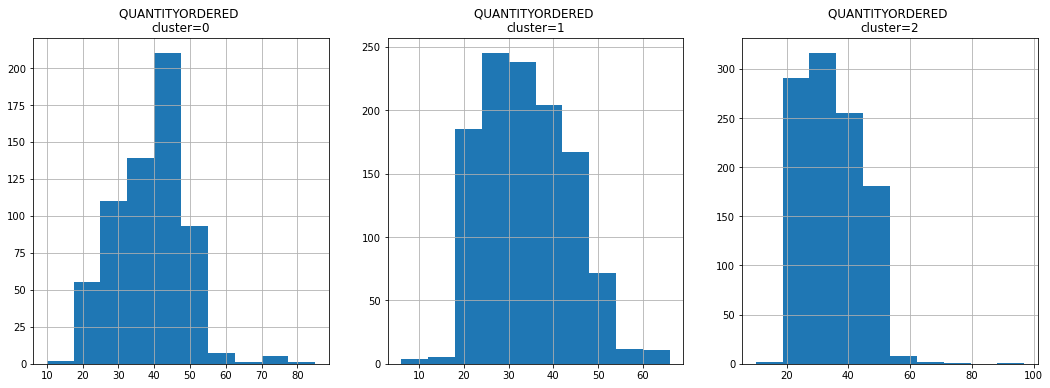

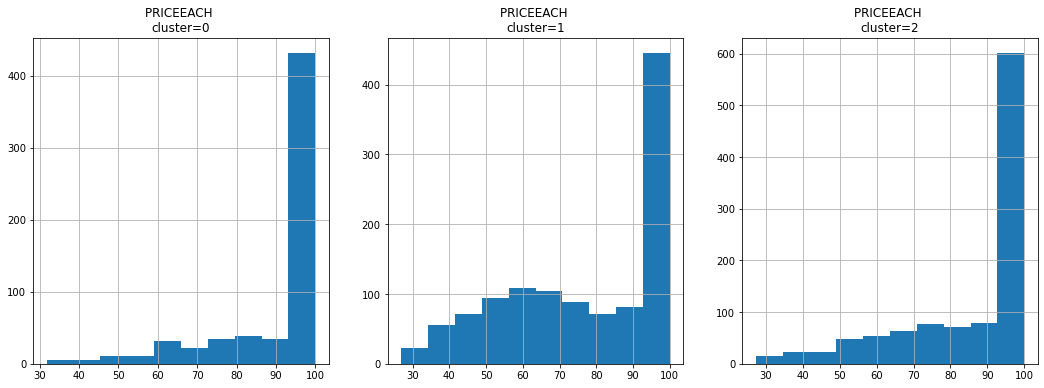

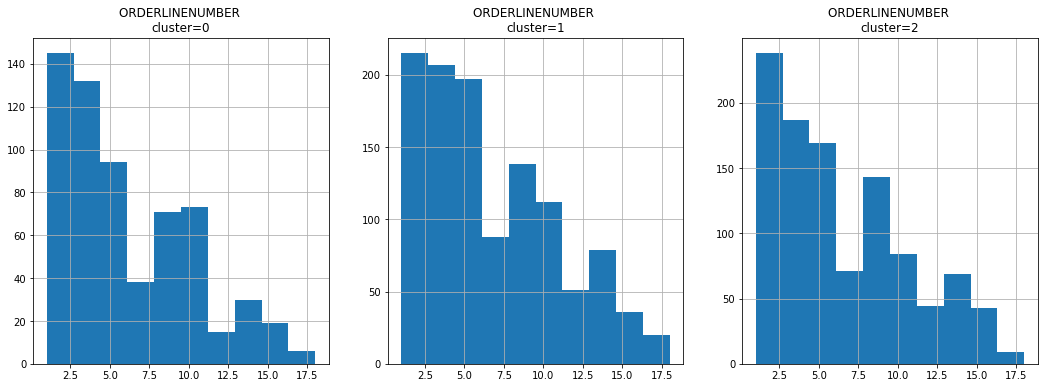

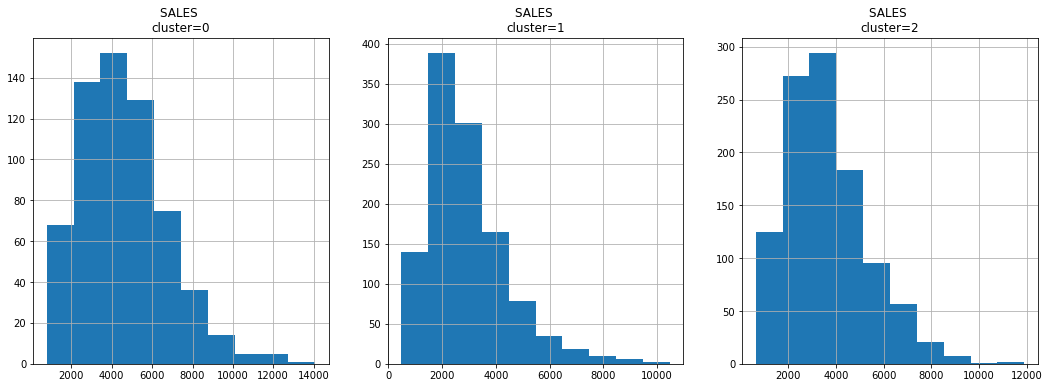

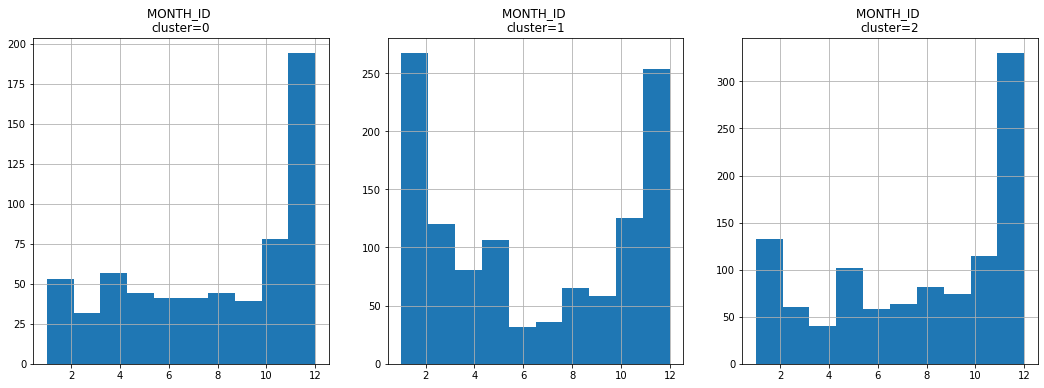

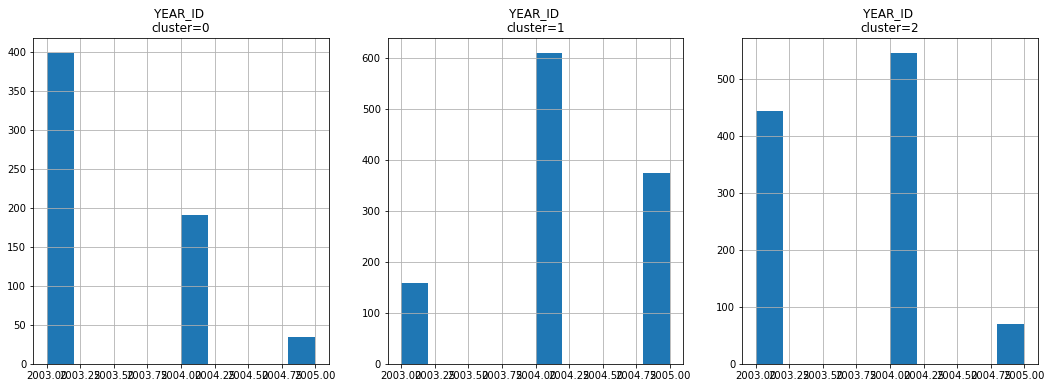

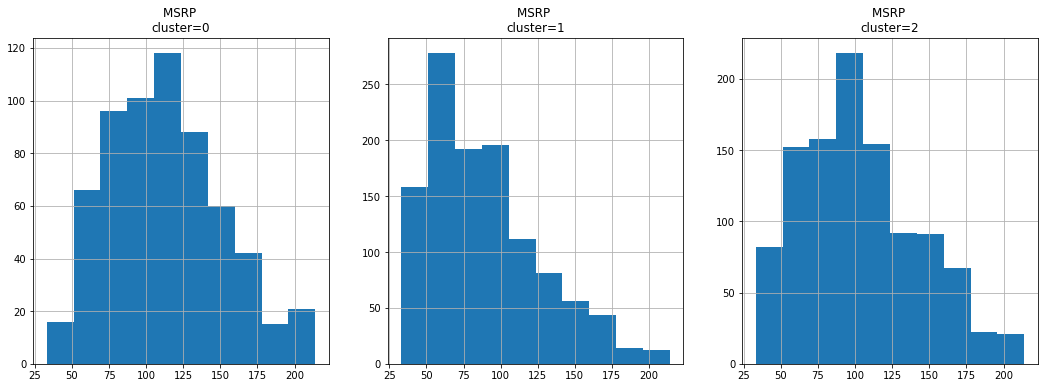

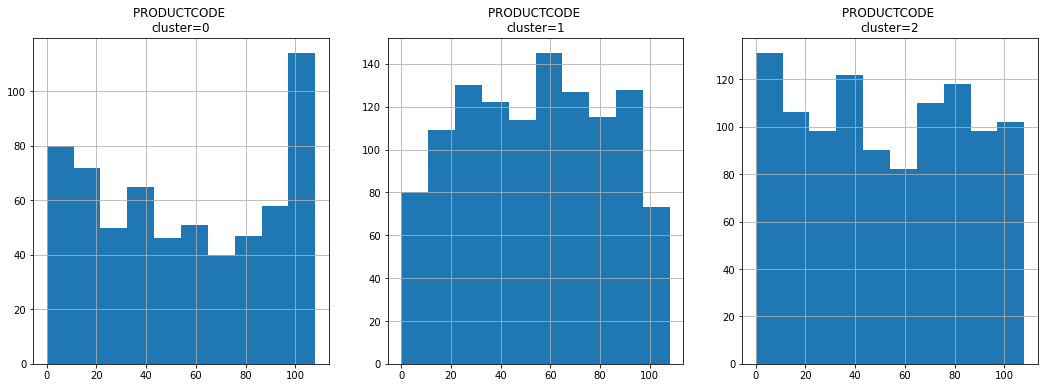

In [118]:
for i in sales_df.columns[:8]:
    plt.figure(figsize=(18,6))
    for j in range(3):
        plt.subplot(1,3, j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist()
        plt.title('{} \ncluster={}'.format(i,j))
        
    plt.show()

In [120]:
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(sales_df_scaled)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1','pca2','pca3'])
pca_df.head()

pca1      pca2      pca3
0 -0.486325 -1.181777  0.990908
1 -0.784567 -1.030095  1.438767
2  1.431603  0.111715  0.302325
3  1.288481 -0.232450 -0.583473
4  1.976052 -0.160536 -1.066488

In [121]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

pca1      pca2      pca3  cluster
0 -0.486325 -1.181777  0.990908        2
1 -0.784567 -1.030095  1.438767        1
2  1.431603  0.111715  0.302325        2
3  1.288481 -0.232450 -0.583473        2
4  1.976052 -0.160536 -1.066488        2

In [123]:
fig = px.scatter_3d(pca_df, x='pca1', y='pca2', z= 'pca3',
                  color = 'cluster', symbol = 'cluster', size_max= 15, opacity = 0.7)
fig.update_layout(margin =  dict(l=0, r=0, b=0, t=0))